# Sign Language MNIST

Sign language recognition using neural networks implemented from scratch.
Dataset: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Print all input files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


# The Data

In [2]:
train_file_path = '/kaggle/input/sign-language-mnist/sign_mnist_train.csv'
train_df = pd.read_csv(train_file_path)
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Feature and Target Selection

In [3]:
X_train = train_df.drop(["label"],axis=1).values / 255.0
Y_train = train_df['label']
Y_train_encoded = pd.get_dummies(Y_train).values.T

# Visualization

3


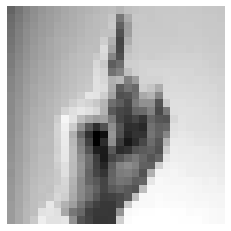

-------------------------------
 18


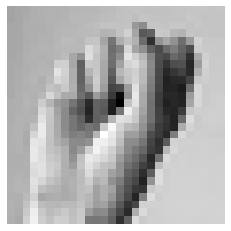

-------------------------------
 24


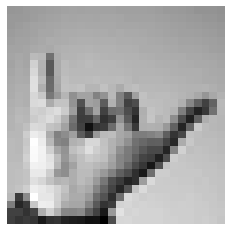

-------------------------------
 2


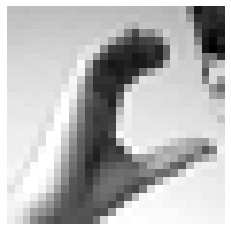

-------------------------------
 8


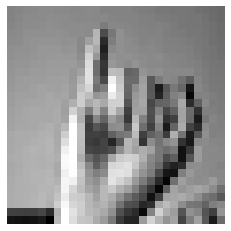

In [4]:
# Função para exibir uma imagem
def exibir_imagem(image_array):
    image_array = image_array.reshape(28, 28)  # Redimensionar a imagem para uma matriz 28x28 (assumindo que as imagens são de tamanho 28x28)
    plt.imshow(image_array, cmap='gray')  # Exibir a imagem em escala de cinza
    plt.axis('off')  # Remover os eixos
    plt.show()

print(Y_train.iloc[0])
exibir_imagem(X_train[0])
print('-------------------------------\n', Y_train.iloc[27])
exibir_imagem(X_train[27])
print('-------------------------------\n', Y_train.iloc[15000])
exibir_imagem(X_train[15000])
print('-------------------------------\n', Y_train.iloc[7032])
exibir_imagem(X_train[7032])
print('-------------------------------\n', Y_train.iloc[20011])
exibir_imagem(X_train[20011])

# Neural Network

In [5]:
import numpy as np

# Função de ativação sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivada da função de ativação sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


# Inicialização dos pesos e bias
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Inicializa os pesos e bias da rede neural.
    Args:
        input_size (int): O tamanho da camada de input.
        hidden_size (int): O tamanho da camada oculta.
        output_size (int): O tamanho da camada de output.
    Returns:
        dict: Dicionário contendo os parâmetros iniciais da rede neural.
    """
    np.random.seed(0)
    weights_input_hidden = np.random.randn(hidden_size, input_size)
    bias_input_hidden = np.zeros((hidden_size, 1))
    weights_hidden_output = np.random.randn(output_size, hidden_size)
    bias_hidden_output = np.zeros((output_size, 1))
    parameters = {
        "weights_input_hidden": weights_input_hidden,
        "bias_input_hidden": bias_input_hidden,
        "weights_hidden_output": weights_hidden_output,
        "bias_hidden_output": bias_hidden_output
    }
    return parameters


# Forward pass
def forward_propagation(X, parameters):
    """
    Realiza o forward pass (propagação direta) na rede neural.
    Args:
        X (numpy.ndarray): A matriz de input.
        parameters (dict): Dicionário contendo os parâmetros da rede neural.
    Returns:
        numpy.ndarray: As saídas da camada de output.
        dict: Dicionário contendo os valores intermediários de cada camada.
    """
    hidden_layer_input = np.dot(parameters["weights_input_hidden"], X) + parameters["bias_input_hidden"]
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(parameters["weights_hidden_output"], hidden_layer_output) + parameters["bias_hidden_output"]
    output_layer_output = sigmoid(output_layer_input)
    cache = {
        "hidden_layer_input": hidden_layer_input,
        "hidden_layer_output": hidden_layer_output,
        "output_layer_input": output_layer_input,
        "output_layer_output": output_layer_output
    }
    return output_layer_output, cache


# Função de custo de erro (Mean Squared Error)
def compute_cost(predictions, labels):
    """
    Calcula o custo do erro usando a função Mean Squared Error (MSE).
    Args:
        predictions (numpy.ndarray): As previsões da rede neural.
        labels (numpy.ndarray): As labels reais dos dados.
    Returns:
        float: O custo do erro.
    """
    num_examples = labels.shape[1]
    cost = np.sum((predictions - labels) ** 2) / (2 * num_examples)
    return cost


# Backpropagation
def backward_propagation(X, Y, cache, parameters):
    """
    Realiza o backpropagation (propagação do erro para trás) na rede neural para calcular os gradientes.
    Args:
        X (numpy.ndarray): A matriz de input.
        Y (numpy.ndarray): As labels reais dos dados.
        cache (dict): Dicionário contendo os valores intermediários de cada camada.
        parameters (dict): Dicionário contendo os parâmetros da rede neural.
    Returns:
        dict: Dicionário contendo os gradientes dos parâmetros.
    """
    num_examples = X.shape[1]
    output_layer_output = cache["output_layer_output"]
    output_layer_input = cache["output_layer_input"]
    hidden_layer_output = cache["hidden_layer_output"]
    hidden_layer_input = cache["hidden_layer_input"]

    delta_output = output_layer_output - Y
    weights_hidden_output_derivative = np.dot(delta_output, hidden_layer_output.T) / num_examples
    bias_hidden_output_derivative = np.sum(delta_output, axis=1, keepdims=True) / num_examples

    delta_hidden = np.dot(parameters["weights_hidden_output"].T, delta_output) * sigmoid_derivative(hidden_layer_input)
    weights_input_hidden_derivative = np.dot(delta_hidden, X.T) / num_examples
    bias_input_hidden_derivative = np.sum(delta_hidden, axis=1, keepdims=True) / num_examples

    gradients = {
        "weights_input_hidden_derivative": weights_input_hidden_derivative,
        "bias_input_hidden_derivative": bias_input_hidden_derivative,
        "weights_hidden_output_derivative": weights_hidden_output_derivative,
        "bias_hidden_output_derivative": bias_hidden_output_derivative
    }
    return gradients


# Atualização dos parâmetros
def update_parameters(parameters, gradients, learning_rate):
    """
    Atualiza os parâmetros da rede neural usando os gradientes calculados.
    Args:
        parameters (dict): Dicionário contendo os parâmetros da rede neural.
        gradients (dict): Dicionário contendo os gradientes dos parâmetros.
        learning_rate (float): A taxa de aprendizado para a atualização dos parâmetros.
    Returns:
        dict: Dicionário contendo os parâmetros atualizados da rede neural.
    """
    parameters["weights_input_hidden"] -= learning_rate * gradients["weights_input_hidden_derivative"]
    parameters["bias_input_hidden"] -= learning_rate * gradients["bias_input_hidden_derivative"]
    parameters["weights_hidden_output"] -= learning_rate * gradients["weights_hidden_output_derivative"]
    parameters["bias_hidden_output"] -= learning_rate * gradients["bias_hidden_output_derivative"]
    return parameters


# Treinamento da rede neural
def train(X, Y, hidden_size, num_iterations, learning_rate):
    """
    Realiza o treinamento da rede neural usando o algoritmo de gradient descent.
    Args:
        X (numpy.ndarray): A matriz de input.
        Y (numpy.ndarray): As labels reais dos dados.
        hidden_size (int): O tamanho da camada oculta.
        num_iterations (int): O número de iterações do treinamento.
        learning_rate (float): A taxa de aprendizado para a atualização dos parâmetros.
    Returns:
        dict: Dicionário contendo os parâmetros treinados da rede neural.
    """
    input_size = X.shape[0]
    output_size = Y.shape[0]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    for i in range(num_iterations):
        predictions, cache = forward_propagation(X, parameters)
        cost = compute_cost(predictions, Y)
        gradients = backward_propagation(X, Y, cache, parameters)
        parameters = update_parameters(parameters, gradients, learning_rate)
        if i % 20 == 0:
            print(f"Iteration: {i}, Cost: {cost}")
            
    # Chame a função export_parameters para salvar os parâmetros
    export_parameters(parameters, "parametros.npz")
    
    return parameters


# Predição
def predict(X, parameters):
    """
    Realiza a predição usando os parâmetros da rede neural.
    Args:
        X (numpy.ndarray): A matriz de input.
        parameters (dict): Dicionário contendo os parâmetros da rede neural.
    Returns:
        numpy.ndarray: As previsões binárias da rede neural.
    """
    predictions, _ = forward_propagation(X, parameters)
    binary_predictions = (predictions > 0.5).astype(int)
    return binary_predictions


# Exportar os parâmetros
def export_parameters(parameters, file_name):
    """
    Exporta os parâmetros da rede neural para um arquivo npz.
    Args:
        parameters (dict): Dicionário contendo os parâmetros da rede neural.
        file_name (str): O nome do arquivo para salvar os parâmetros.
    """
    np.savez(file_name, **parameters)
    print("Parâmetros exportados com sucesso!")


# Training

In [6]:
hidden_size = 128
num_iterations = 500
learning_rate = 0.2

parameters = train(X_train.T, Y_train_encoded, hidden_size, num_iterations, learning_rate)

Iteration: 0, Cost: 5.211391572347058
Iteration: 20, Cost: 0.5106958759383384
Iteration: 40, Cost: 0.4955975646628618
Iteration: 60, Cost: 0.4878169611922977
Iteration: 80, Cost: 0.483021811951417
Iteration: 100, Cost: 0.47970794814717066
Iteration: 120, Cost: 0.4772180885243144
Iteration: 140, Cost: 0.4748436277898807
Iteration: 160, Cost: 0.4721482535192434
Iteration: 180, Cost: 0.4696550770807948
Parâmetros exportados com sucesso!


# Testing

In [7]:
# Carregar e pré-processar os dados de teste
test_file_path = '/kaggle/input/sign-language-mnist/sign_mnist_test.csv'
test_df = pd.read_csv(test_file_path)
X_test = test_df.drop(["label"],axis=1).values / 255.0
Y_test = test_df['label']

# Fazer as predições no conjunto de teste
predictions = predict(X_test.T, parameters)

# Avaliar as predições
accuracy = np.mean(predictions == pd.get_dummies(Y_test).values.T)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9578569436698271


# Deploy Link
https://huggingface.co/spaces/luisgaboardi/neural-net/tree/main